# Best fit of ellipse
### Irving Gomez Mendez
### February 12, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

The general formula of a ellipse is given by $$x^2 + By^2 + Cxy + Dx + Ey + F = 0,$$ i.e. $$By^2 + Cxy + Dx + Ey + F = -x^2.$$

We can see this problem as finding the function $$f(x,y) = x^2 + By^2 + Cxy + Dx + Ey + F,$$ which minimizes the data:

| x  | y  | f(x,y)|
|:--:|:--:|:-----:|
| x1 | y1 | 0 |
| x2 | y2 | 0 |

In [2]:

points = np.array([[0,2],[2,1],[1,-1],[-1,-2],[-3,1],[-3,-2]])

points_x = points[:,0]
points_y = points[:,1]
points_x2 = points_x**2
points_y2 = points_y**2
points_xy = points_x*points_y

n = points.shape[0]
yy = -points_x2
XX = np.vstack([points_y2, points_xy, points_x, points_y, np.ones(len(points_x))]).T
p = XX.shape[1]

# We get the coeff.
B, C, D, E, F = np.linalg.lstsq(XX, yy, rcond=None)[0]
SSR = np.linalg.lstsq(XX, yy, rcond=None)[1]

# We plot the ellipse
x = np.linspace(-4.5, 2.5, 50)
y = np.linspace(-2.5, 2.5, 50)
x, y = np.meshgrid(x, y)

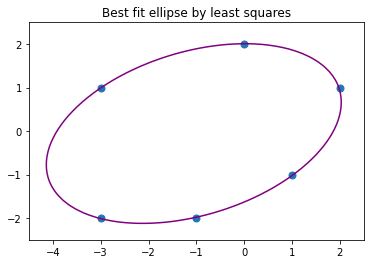

In [3]:
plt.plot(points_x, points_y, 'o', markersize=7)
CS = plt.contour(x, y, (x**2+B*y**2+C*x*y+D*x+E*y+F), [0], colors='purple')
plt.title('Best fit ellipse by least squares')
#plt.savefig('ellipse_parabola.png')

In [4]:
# These are the points on the ellipse
points_ellipse = CS.allsegs[0][0]

ellipse_x = points_ellipse[:,0]
ellipse_y = points_ellipse[:,1]
ellipse_y2 = ellipse_y**2
ellipse_x2 = ellipse_x**2
ellipse_xy = ellipse_x*ellipse_y

ellipse_matrix = np.vstack([ellipse_y2, ellipse_xy, ellipse_x, ellipse_y, np.ones(len(ellipse_x))]).T

### Confidence interval
Remember that the points on the adjusted ellipse satisfied: $\hat{f}(x,y)=0$.

So the interval is just given by $$\pm t_{\alpha/2,n-p}\sqrt{\frac{SSE}{n-p}X_0(X^TX)^{-1}X_0^T}$$ which represent the level on which the conic surface should be cut.

Text(0.5, 1.0, 'Best fit ellipse by least squares')

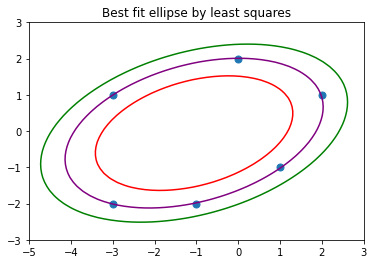

In [5]:
alpha = 0.05
aux_t = np.sqrt(SSR/(n-p)*(np.diag(ellipse_matrix @ np.linalg.inv(XX.T @ XX) @ ellipse_matrix.T)))
upp_contour = np.mean(t.ppf(1-alpha/2,1)*aux_t)
low_contour = np.mean(-t.ppf(1-alpha/2,1)*aux_t)

x = np.linspace(-5, 3, 50)
y = np.linspace(-3, 3, 50)
x, y = np.meshgrid(x, y)

plt.plot(points_x, points_y, 'o', markersize=7)
CS = plt.contour(x, y, (x**2+B*y**2+C*x*y+D*x+E*y+F), [low_contour, 0, upp_contour], colors=['red', 'purple', 'green'])
plt.title('Best fit ellipse by least squares')